C:\Users\camara\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


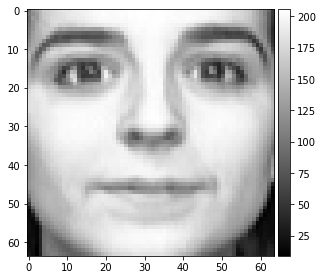

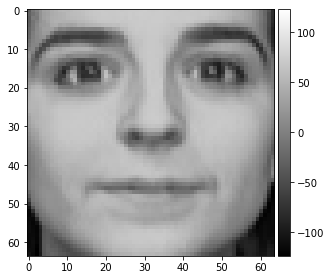

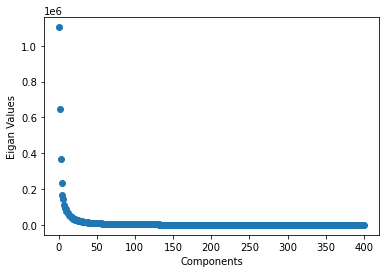

NameError: name 'value' is not defined

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import scipy.stats as ss 
import scipy.optimize as so
from sklearn.decomposition import PCA
import skimage.io
from PIL import Image
from skimage.color import rgb2gray

from sklearn import linear_model
%matplotlib inline
from pathlib import Path

def getImage(arr):
    image = np.ones((64,64))
    x = 0
    for i in range(64):
        for j in range(64):
            image[j][i] = arr[x]
            x = x+1
    image = np.array(image, dtype='uint8')        
    return image

#initialize paths to data files
faceFile = Path.cwd() / 'faces.dat'
data = np.loadtxt(faceFile)

#open and initialize data for training
faces = open(faceFile,"r")
faces = faces.read()
faces = faces.split("\n")
faces.pop()
for line in range (len(faces)):
    faces[line] =  faces[line].lstrip()
    faces[line] = faces[line].split("   ")
    for x in range(0,len(faces[line])):
        faces[line][x] = float(faces[line][x])        
faceMatrix = np.array(faces)
faceMatrix1 = faceMatrix
faceMatrix = np.reshape(faceMatrix, (400,64,64))

#3a) display 100th image
#Face100 = getImage(faceMatrix[99])
skimage.io.imshow(rgb2gray(faceMatrix[99].T), cmap=plt.cm.gray)
skimage.io.show()

#3b) get mean of images and minus it out then display 100th image
tempMeanImage = np.zeros((64,64))
tempMeanImage = faceMatrix.mean()
centeredMatrix = np.empty((400,64,64))
for i in range(400):
    centeredMatrix[i] = faceMatrix[i] - tempMeanImage
skimage.io.imshow(rgb2gray(centeredMatrix[99].T), cmap=plt.cm.gray)
skimage.io.show()

#reshape matrix
centeredMatrix1 = np.reshape(centeredMatrix, (400,4096))

#3c) preform pca and show eigan values
#3d)
#in word doc
#3e)(e) 
#in word doc
pca = PCA(n_components=400)
pca.fit(centeredMatrix1)
varienceRatio =  np.sort(pca.explained_variance_)[::-1]
plt.scatter(range(1,len(varienceRatio)+1),varienceRatio)
plt.ylabel('Eigan Values')
plt.xlabel('Components')
plt.show()

#get components
eiganValue = pca.components_
valueReshape = np.reshape(value[0], (64,64))

#3f)s] 
print("displaying top-5 leading eiganvectors:")
value = pca.components_
for i in range(5):
    valueReshape = np.reshape(eiganValue[i], (64,64))
    skimage.io.imshow(valueReshape.T, cmap=plt.cm.gray)
    skimage.io.show()

#3g) Something was wrong with my eiganvalues, It think it was the way i got the mean, but my images dont look like they prob should
#hope i can still get part markes for having the right code
print("reconstructed 100th images using the sum up to components 10,100,200,399:")
components = [10,100,200,399]
newNewValue = np.zeros((64,64))

#newNewValue = np.reshape(newNewValue, (64,64))
for i in range(400):
    newValue = np.dot( np.dot(eiganValue[i],eiganValue[i]) , centeredMatrix[99] )
    newNewValue = newNewValue + newValue
    if(i in components):
        skimage.io.imshow(newNewValue.T, cmap=plt.cm.gray)
        skimage.io.show()